# Task 3: Genetic Algorithm #

This section develops the clustering analysis by applying a Genetic Algorithm (GA) to optimise clustering performance. Initially, a GA was implemented to determine the optimal number of clusters (k) for K-Means. The optimisation consistently converged to **k = 2**, which aligned with earlier manual testing results from Task 2. Since this confirmed previous results, the focus was then shifted towards feature selection. 

### Feature Selection?

The QoE dataset contains around 90 features, and while high dimensionality can capture complex behaviour, it can also introduce noise, lower interpretability, and redundant information. Therfore, this task will aim at exploring **Which subset of features produces the highest quality cluster separation?**


In [14]:
# Import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

The below is the initial use of GA to find the optimal number of clusters for K-Means. This consistently settled on k=2, which had already been identified through manual testing and did not improve the clustering results or add new insight.

Gen 1: Best k = 2, Score = 0.4289
Gen 2: Best k = 2, Score = 0.4289
Gen 3: Best k = 2, Score = 0.4289
Gen 4: Best k = 2, Score = 0.4289
Gen 5: Best k = 2, Score = 0.4289
Gen 6: Best k = 2, Score = 0.4289
Gen 7: Best k = 2, Score = 0.4289
Gen 8: Best k = 2, Score = 0.4289
Gen 9: Best k = 2, Score = 0.4289
Gen 10: Best k = 2, Score = 0.4289
Gen 11: Best k = 2, Score = 0.4289
Gen 12: Best k = 2, Score = 0.4289
Gen 13: Best k = 2, Score = 0.4289
Gen 14: Best k = 2, Score = 0.4289
Gen 15: Best k = 2, Score = 0.4289
Gen 16: Best k = 2, Score = 0.4289
Gen 17: Best k = 2, Score = 0.4289
Gen 18: Best k = 2, Score = 0.4289
Gen 19: Best k = 2, Score = 0.4289
Gen 20: Best k = 2, Score = 0.4289

Final Best k from GA: 2 with Silhouette Score: 0.4289


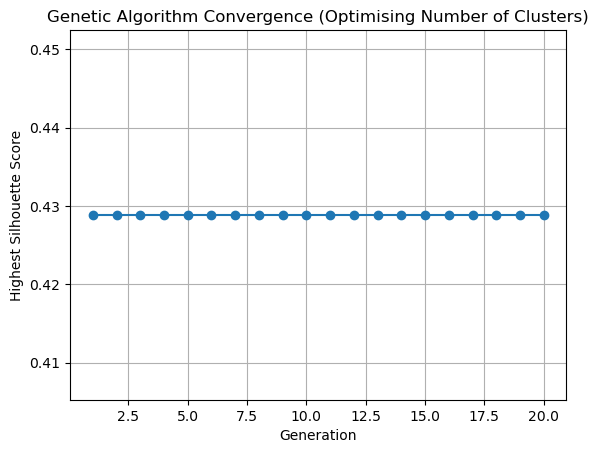

In [15]:
#loading scaled clustering data
scaled_df = pd.read_csv("clustering_data_scaled.csv")
X = scaled_df.values

#for reproducibility
random.seed(29)
np.random.seed(29)

#configure GA
POP_SIZE = 10
N_GENERATIONS = 20
K_RANGE = list(range(2, 11))
MUTATION_RATE = 0.3
TOURNAMENT_SIZE = 3

def evaluate_k(k: int) -> float:
    """Silhouette score for the specified k."""
    try:
        labels = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(X)
        return silhouette_score(X, labels)
    except Exception:
        return -1.0  # invalid configs get punished

def initialize_population():
    return [random.choice(K_RANGE) for _ in range(POP_SIZE)]

def tournament_selection(pop):
    return max(random.sample(pop, TOURNAMENT_SIZE), key=evaluate_k)

def crossover(parent1, parent2):
    return random.choice([parent1, parent2])

def mutate(k):
    if random.random() < MUTATION_RATE:
        return random.choice(K_RANGE)
    return k

population = initialize_population()
best_k_history = []
best_score_history = []

for gen in range(N_GENERATIONS):
    new_population = []
    for _ in range(POP_SIZE):
        p1 = tournament_selection(population)
        p2 = tournament_selection(population)
        child = crossover(p1, p2)
        child = mutate(child)
        new_population.append(child)

    population = new_population
    scores = [evaluate_k(k) for k in population]
    best_k = population[int(np.argmax(scores))]
    best_score = float(np.max(scores))
    best_k_history.append(best_k)
    best_score_history.append(best_score)

    print(f"Gen {gen+1}: Best k = {best_k}, Score = {best_score:.4f}")

final_best_k = best_k_history[-1]
final_best_score = best_score_history[-1]
print(f"\nFinal Best k from GA: {final_best_k} with Silhouette Score: {final_best_score:.4f}")

plt.plot(range(1, N_GENERATIONS + 1), best_score_history, marker="o")
plt.title("Genetic Algorithm Convergence (Optimising Number of Clusters)")
plt.xlabel("Generation")
plt.ylabel("Highest Silhouette Score")
plt.grid(True)
plt.show()

**Results:** 
GA in this case confirmed what was already established in Task 2. Now it will be used in a different way to provide better insights.

**Next Steps** GA will be used to remove redundant and noisy features to achieve clearer separation and improved silhouette scores.

Gen 1: Best = 0.5628
Gen 2: Best = 0.6317
Gen 3: Best = 0.6524
Gen 4: Best = 0.6841
Gen 5: Best = 0.7010
Gen 6: Best = 0.7118
Gen 7: Best = 0.7118
Gen 8: Best = 0.7140
Gen 9: Best = 0.7432
Gen 10: Best = 0.7432
Gen 11: Best = 0.7432
Gen 12: Best = 0.7432
Gen 13: Best = 0.7432
Gen 14: Best = 0.7510
Gen 15: Best = 0.7510
Gen 16: Best = 0.7510
Gen 17: Best = 0.7510
Gen 18: Best = 0.7526
Gen 19: Best = 0.7526
Gen 20: Best = 0.7526
Gen 21: Best = 0.7597
Gen 22: Best = 0.7597
Gen 23: Best = 0.7597
Gen 24: Best = 0.7626
Gen 25: Best = 0.7643
Gen 26: Best = 0.7990
Gen 27: Best = 0.7990
Gen 28: Best = 0.7990
Gen 29: Best = 0.7990
Gen 30: Best = 0.7990
Gen 31: Best = 0.7990
Gen 32: Best = 0.7990
Gen 33: Best = 0.8045
Gen 34: Best = 0.8045
Gen 35: Best = 0.8045
Gen 36: Best = 0.8045
Gen 37: Best = 0.8045
Gen 38: Best = 0.8045
Gen 39: Best = 0.8045
Gen 40: Best = 0.8045
Gen 41: Best = 0.8064
Gen 42: Best = 0.8064
Gen 43: Best = 0.8064
Gen 44: Best = 0.8064
Gen 45: Best = 0.8064
Gen 46: Best = 0.81

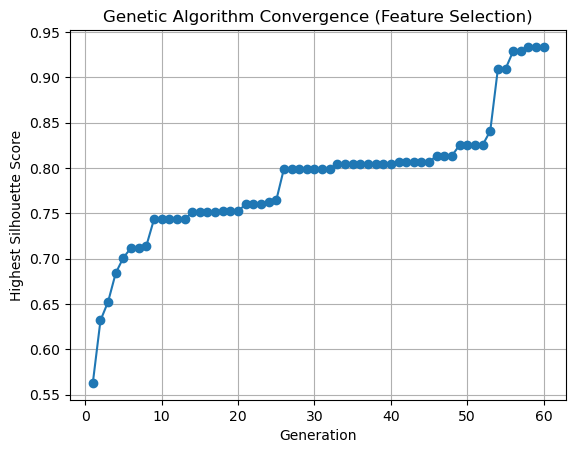

In [18]:
#load original cleaned features to get correct feature names and order
original_df = pd.read_csv("features_final_cleaned.csv")

#exclude these columns from modelling
exclude_cols = ["Cluster", "DBSCAN_Cluster", "Agglo_Cluster", "module_run"]
feature_names = [c for c in original_df.columns if c not in exclude_cols]

#make sure scaled data matches the feature order
scaled_df = scaled_df[feature_names]
scaled_array = scaled_df.values

#use k selected by GA above
n_clusters = int(final_best_k)

#for reproducibility
random.seed(29)
np.random.seed(29)

#configure GA
population_size = 30
generations = 60
mutation_rate = 0.25
elitism = 2  

def evaluate_features(individual) -> float:
    """Evaluates a feature subset using K-Means silhouette score."""
    idx = [i for i, bit in enumerate(individual) if bit == 1]
    if len(idx) < 2:
        return -1.0
    subset = scaled_array[:, idx]
    try:
        labels = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit_predict(subset)
        return silhouette_score(subset, labels)
    except Exception:
        return -1.0

def initialize_population(size, dim):
    return [np.random.randint(0, 2, size=dim).tolist() for _ in range(size)]

def crossover(p1, p2):
    point = random.randint(1, len(p1)- 2)
    return p1[:point] + p2[point:]

def mutate(ind):
    i = random.randint(0, len(ind)- 1)
    ind[i] ^= 1
    return ind

def select_elite(pop, scores, n=2):
    ranked = sorted(zip(scores, pop), key=lambda x: x[0], reverse=True)
    return [ind for _, ind in ranked[:n]]

population = initialize_population(population_size, len(feature_names))
best_scores = []

for g in range(generations):
    scores = [evaluate_features(ind) for ind in population]
    best_scores.append(float(np.max(scores)))
    elites = select_elite(population, scores, n=elitism)
    new_pop = elites[:]
    while len(new_pop) < population_size:
        parent1 = random.choice(elites)
        parent2 = random.choice(population)
        child = crossover(parent1, parent2)
        if random.random() < mutation_rate:
            child = mutate(child)
        new_pop.append(child)

    population = new_pop
    print(f"Gen {g+1}: Best = {best_scores[-1]:.4f}")

final_scores = [evaluate_features(ind) for ind in population]
best_ind = population[int(np.argmax(final_scores))]
selected = [feature_names[i] for i, bit in enumerate(best_ind) if bit == 1]

print(f"\nChosen k = {n_clusters}")
print(f"Best Silhouette Score from GA feature selection: {float(np.max(final_scores)):.4f}")
print(f"Selected features ({len(selected)}):\n{selected}")

plt.plot(range(1, generations + 1), best_scores, marker="o")
plt.title("Genetic Algorithm Convergence (Feature Selection)")
plt.xlabel("Generation")
plt.ylabel("Highest Silhouette Score")
plt.grid(True)
plt.show()


The convergence plot shows how the silhouette score improved over each generation. Early improvements were more gradual but larger gains appeared later as the GA refined the feature combinations. This suggests that the search process was progressively identifying more informative feature subsets.

## Feature Selection Results

A Genetic Algorithm (GA) was used to find a smaller set of features that improves clustering quality in the QoE dataset. 
The best silhouette score increased from **0.5628** in the first generation to **0.9336** in the final, 60th, generation. This is a great improvement that demonstrates that the original full feature set contained redundancy or noise that was potential weakening cluster separation. However, that number is noticeably high. This optimisation was performed using fixed random seeds for reproducibility, but the GA could be re-run with different initialisations to further assess solution stability.


### Selected Feature Subset (13 Features)

The GA selected the following features:

- `positionZ_mean`
- `frameSize_std`
- `framesDisplayed_std`
- `rtpPacketSize_std`
- `avgServedBlocksDl_min`
- `frameSize_min`
- `framesDisplayed_min`
- `playoutBufferLength_min`
- `rtpLoss_min`
- `avgServedBlocksDl_max`
- `frameSize_max`
- `framesDisplayed_max`
- `rtpPacketSize_max`

Most of these selected features relate directly to video delivery behaviour and playback consistency, suggesting the clusters are separating sessions with stable and consistent video performance from sessions with more inconsistent network conditions, or distinguishing between stronger and weaker QoE environments.

Silhouette (All features): 0.4289
Silhouette (GA-selected):  0.9336


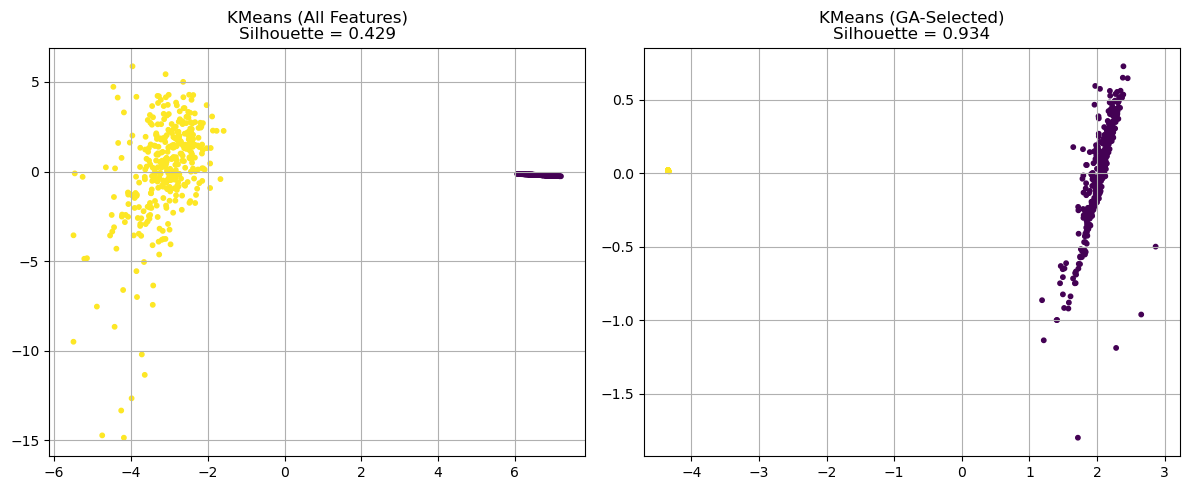

In [19]:
#Compare clustering performance (Full feature set vs GA selected subset)

#full features
labels_all = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit_predict(scaled_df.values)
score_all = silhouette_score(scaled_df.values, labels_all)

#GA selected features
selected_df = scaled_df[selected]
labels_opt = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit_predict(selected_df.values)
score_opt = silhouette_score(selected_df.values, labels_opt)

print(f"Silhouette (All features): {score_all:.4f}")
print(f"Silhouette (GA-selected):  {score_opt:.4f}")

#PCA projection for visualisation
pca_all = PCA(n_components=2).fit_transform(scaled_df.values)
pca_opt = PCA(n_components=2).fit_transform(selected_df.values)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(pca_all[:, 0], pca_all[:, 1], c=labels_all, s=10)
ax[0].set_title(f"KMeans (All Features)\nSilhouette = {score_all:.3f}")
ax[0].grid(True)

ax[1].scatter(pca_opt[:, 0], pca_opt[:, 1], c=labels_opt, s=10)
ax[1].set_title(f"KMeans (GA-Selected)\nSilhouette = {score_opt:.3f}")
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [27]:
#Cluster profiles table (using GA-selected clustering labels)

original_df = pd.read_csv("features_final_cleaned.csv")
original_df["Cluster"] = labels_opt  

cluster_summary = original_df.groupby("Cluster")[selected].mean()

print("Cluster Feature Means (GA-selected features):")
print(cluster_summary)

Cluster Feature Means (GA-selected features):
         positionZ_mean  frameSize_std  framesDisplayed_std  \
Cluster                                                       
0                   0.0    5865.641797             0.454168   
1                   0.0       0.000000             0.000000   

         rtpPacketSize_std  avgServedBlocksDl_min  frameSize_min  \
Cluster                                                            
0               319.079566                    0.0            0.0   
1                 0.000000                    0.0            0.0   

         framesDisplayed_min  playoutBufferLength_min  rtpLoss_min  \
Cluster                                                              
0                        0.0                      1.0     1.011111   
1                        0.0                      0.0     0.000000   

         avgServedBlocksDl_max  frameSize_max  framesDisplayed_max  \
Cluster                                                              
0      

**Results:** When using all features, K-Means achieved a silhouette score of **0.4289** suggesting only moderate separation between clusters. After applying the Genetic Algorithm for feature selection the silhouette score increased to **0.9336**, which is a large improvement. By reducing the dataset to 13 selected features, the GA focused the clustering on the variables that most strongly differentiate the data.

However, when examining the cluster profiles it is clear that the high score was largely driven by a structural split between active streaming sessions and sessions with almost no activity. this suggests the the optimisation identified a simple binary pattern in the dataset.

To better understand the data, the analysis will be refined further by using only active data to allow clustering to focus on variations in network conditions and playback performance, instead of simply separating active and inactive sessions.

## Further analysis : Focusing on active-only sessions 

In [22]:
#reload original and scaled datasets
original_df_full = pd.read_csv("features_final_cleaned.csv")
scaled_df_full = pd.read_csv("clustering_data_scaled.csv")

#excluding columns & align data 
exclude_cols = ["Cluster", "DBSCAN_Cluster", "Agglo_Cluster", "module_run"]
feature_names_full = [c for c in original_df_full.columns if c not in exclude_cols]
scaled_df_full = scaled_df_full[feature_names_full]

#defining what an "active" session is, a 0 suggests innactive 
active_mask = (
    (original_df_full["frameSize_max"] > 0) |
    (original_df_full["rtpPacketSize_max"] > 0) |
    (original_df_full["framesDisplayed_max"] > 0)
)

#dataset containing 'active only'
original_df_active = original_df_full.loc[active_mask].copy()
scaled_df_active = scaled_df_full.loc[active_mask].copy()

print(f"Total rows:  {len(original_df_full)}")
print(f"Active rows: {len(original_df_active)}")
print(f"Removed as inactive: {len(original_df_full) - len(original_df_active)}"

Total rows:  528
Active rows: 360
Removed as inactive: 168


k=2: silhouette=0.1580
k=3: silhouette=0.1072
k=4: silhouette=0.1116
k=5: silhouette=0.1178
k=6: silhouette=0.1238
k=7: silhouette=0.1281
k=8: silhouette=0.0812
k=9: silhouette=0.0930
k=10: silhouette=0.1058

Best k (active-only) = 2 with silhouette = 0.1580


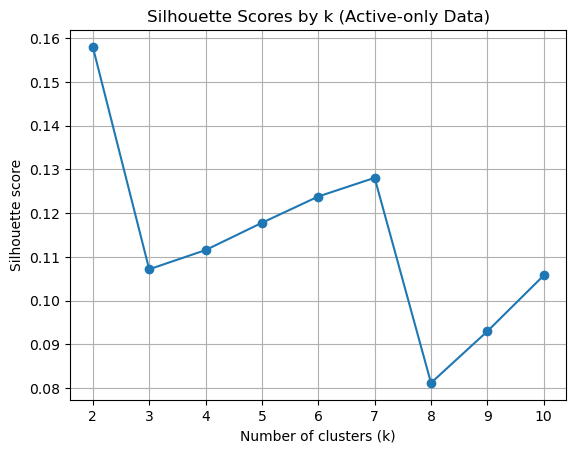

In [23]:
#find best K for active only data 
X_active = scaled_df_active.values

k_candidates = range(2, 11)
scores = []

for k in k_candidates:
    labels = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(X_active)
    score = silhouette_score(X_active, labels)
    scores.append(score)
    print(f"k={k}: silhouette={score:.4f}")

best_k_active = int(k_candidates[int(np.argmax(scores))])
best_score_active = float(np.max(scores))

print(f"\nBest k (active-only) = {best_k_active} with silhouette = {best_score_active:.4f}")

plt.plot(list(k_candidates), scores, marker="o")
plt.title("Silhouette Scores by k (Active-only Data)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.grid(True)
plt.show()

Gen 1: Best = 0.6645
Gen 2: Best = 0.6645
Gen 3: Best = 0.6810
Gen 4: Best = 0.6810
Gen 5: Best = 0.6810
Gen 6: Best = 0.6998
Gen 7: Best = 0.6998
Gen 8: Best = 0.6998
Gen 9: Best = 0.6998
Gen 10: Best = 0.7106
Gen 11: Best = 0.7106
Gen 12: Best = 0.7106
Gen 13: Best = 0.7106
Gen 14: Best = 0.7106
Gen 15: Best = 0.7106
Gen 16: Best = 0.7106
Gen 17: Best = 0.7194
Gen 18: Best = 0.7376
Gen 19: Best = 0.7470
Gen 20: Best = 0.7470
Gen 21: Best = 0.7470
Gen 22: Best = 0.7552
Gen 23: Best = 0.7552
Gen 24: Best = 0.7618
Gen 25: Best = 0.7618
Gen 26: Best = 0.7618
Gen 27: Best = 0.7626
Gen 28: Best = 0.7729
Gen 29: Best = 0.7729
Gen 30: Best = 0.7729
Gen 31: Best = 0.7729
Gen 32: Best = 0.7813
Gen 33: Best = 0.7813
Gen 34: Best = 0.7813
Gen 35: Best = 0.7813
Gen 36: Best = 0.7813
Gen 37: Best = 0.7813
Gen 38: Best = 0.7813
Gen 39: Best = 0.7813
Gen 40: Best = 0.7813
Gen 41: Best = 0.7862
Gen 42: Best = 0.7862
Gen 43: Best = 0.7876
Gen 44: Best = 0.7876
Gen 45: Best = 0.7876
Gen 46: Best = 0.78

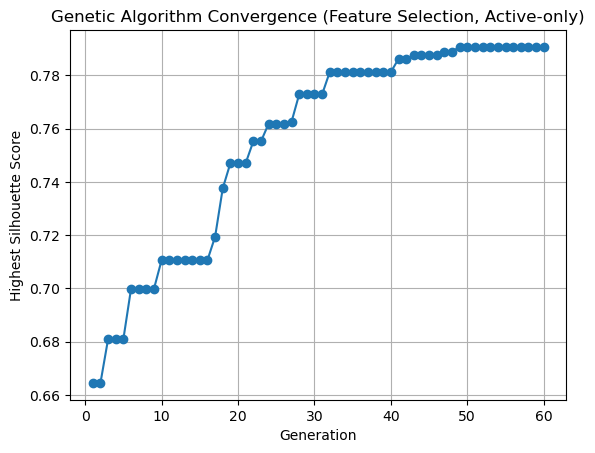

In [24]:
#best K for active-only data was still 2
#configure GA with the same a previous round
population_size = 30
generations = 60
mutation_rate = 0.25
elitism = 2

n_clusters_active = best_k_active  
feature_names_active = feature_names_full
scaled_array_active = scaled_df_active.values

def evaluate_features_active(individual) -> float:
    """Evaluates a feature subset using K-Means silhouette score (on active-only data)."""
    idx = [i for i, bit in enumerate(individual) if bit == 1]
    if len(idx) < 2:
        return -1.0

    subset = scaled_array_active[:, idx]

    try:
        labels = KMeans(n_clusters=n_clusters_active, random_state=42, n_init="auto").fit_predict(subset)
        return silhouette_score(subset, labels)
    except Exception:
        return -1.0

def initialize_population(size, dim):
    return [np.random.randint(0, 2, size=dim).tolist() for _ in range(size)]

def crossover(p1, p2):
    point = random.randint(1, len(p1) - 2)
    return p1[:point] + p2[point:]

def mutate(ind):
    i = random.randint(0, len(ind) - 1)
    ind[i] ^= 1
    return ind

def select_elite(pop, scores, n=2):
    ranked = sorted(zip(scores, pop), key=lambda x: x[0], reverse=True)
    return [ind for _, ind in ranked[:n]]

#run GA
population = initialize_population(population_size, len(feature_names_active))
best_scores_active = []

for g in range(generations):
    scores_gen = [evaluate_features_active(ind) for ind in population]
    best_scores_active.append(float(np.max(scores_gen)))

    elites = select_elite(population, scores_gen, n=elitism)
    new_pop = elites[:]

    while len(new_pop) < population_size:
        parent1 = random.choice(elites)
        parent2 = random.choice(population)
        child = crossover(parent1, parent2)
        if random.random() < mutation_rate:
            child = mutate(child)
        new_pop.append(child)

    population = new_pop
    print(f"Gen {g+1}: Best = {best_scores_active[-1]:.4f}")

#final best individual
final_scores_active = [evaluate_features_active(ind) for ind in population]
best_ind_active = population[int(np.argmax(final_scores_active))]
selected_active = [feature_names_active[i] for i, bit in enumerate(best_ind_active) if bit == 1]

print(f"\nChosen k (active-only) = {n_clusters_active}")
print(f"Best Silhouette Score (GA feature selection, active-only): {float(np.max(final_scores_active)):.4f}")
print(f"Selected features ({len(selected_active)}):\n{selected_active}")

plt.plot(range(1, generations + 1), best_scores_active, marker="o")
plt.title("Genetic Algorithm Convergence (Feature Selection on Active-only data)")
plt.xlabel("Generation")
plt.ylabel("Highest Silhouette Score")
plt.grid(True)
plt.show()


**Selected Features:**
The 14 selected features for all active-only sessions are:
- 'firstFrameElapsedTime_mean'
- 'end2endDelay_std'
- 'avgServedBlocksDl_min'
- 'end2endDelay_min'
- 'frameSize_min'
- 'framesDisplayed_min'
- 'interArrivalTimeRtp_min'
- 'playoutBufferLength_min'
- 'positionX_min'
- 'positionZ_min'
- 'servingCell_min'
- 'averageCqiDl_max'
- 'framesDisplayed_max'
- 'positionZ_max'

This suggests that startup delay, network quality, and user location are the main factors driving differences between these active streaming sessions.

Silhouette (Active-only, All features): 0.1580
Silhouette (Active-only, GA-selected):  0.7907


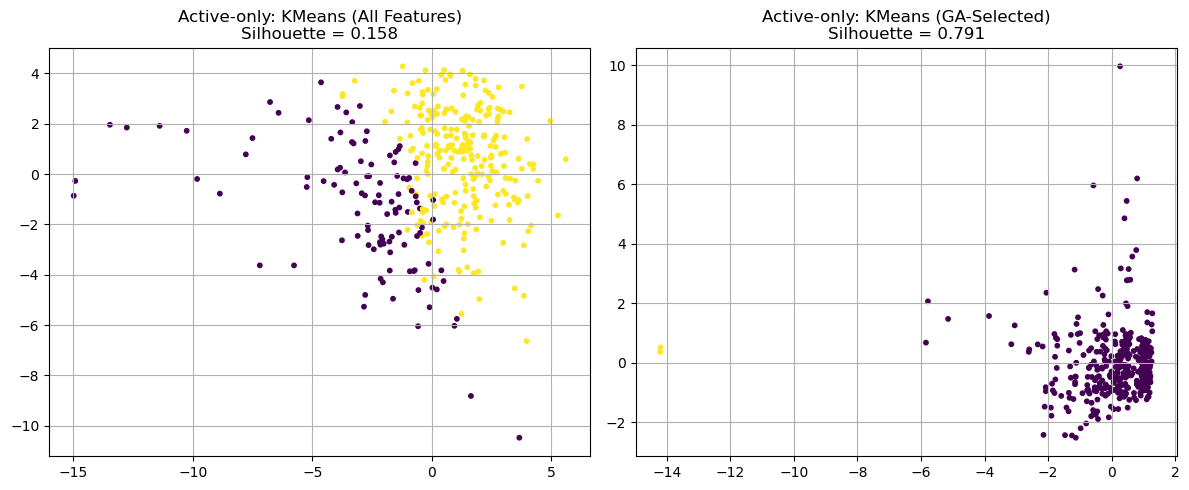

In [25]:
#comparison of clustering all Active-only features vs GA

#active-only features 
labels_all_active = KMeans(n_clusters=n_clusters_active, random_state=42, n_init="auto").fit_predict(scaled_df_active.values)
score_all_active = silhouette_score(scaled_df_active.values, labels_all_active)

#GA selected features (on active-only data)
selected_df_active = scaled_df_active[selected_active]
labels_opt_active = KMeans(n_clusters=n_clusters_active, random_state=42, n_init="auto").fit_predict(selected_df_active.values)
score_opt_active = silhouette_score(selected_df_active.values, labels_opt_active)

print(f"Silhouette (Active-only, All features): {score_all_active:.4f}")
print(f"Silhouette (Active-only, GA-selected):  {score_opt_active:.4f}")

#PCA to visualise 
pca_all_active = PCA(n_components=2).fit_transform(scaled_df_active.values)
pca_opt_active = PCA(n_components=2).fit_transform(selected_df_active.values)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(pca_all_active[:, 0], pca_all_active[:, 1], c=labels_all_active, s=10)
ax[0].set_title(f"Active-only: KMeans (All Activeonly Features)\nSilhouette = {score_all_active:.3f}")
ax[0].grid(True)

ax[1].scatter(pca_opt_active[:, 0], pca_opt_active[:, 1], c=labels_opt_active, s=10)
ax[1].set_title(f"Active-only: KMeans (GA-Selected)\nSilhouette = {score_opt_active:.3f}")
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [26]:
#Cluster profiling: All Active-only features vs GA

original_df_active = original_df_active.copy()
original_df_active["Cluster_Active"] = labels_opt_active

cluster_summary_active = original_df_active.groupby("Cluster_Active")[selected_active].mean()

print("Cluster Feature Means (Active-only, GA-selected features):")
print(cluster_summary_active)


Cluster Feature Means (Active-only, GA-selected features):
                firstFrameElapsedTime_mean  end2endDelay_std  \
Cluster_Active                                                 
0                                 3.890225          0.093488   
1                                65.257833          0.031174   

                avgServedBlocksDl_min  end2endDelay_min  frameSize_min  \
Cluster_Active                                                           
0                                 0.0          0.001047            0.0   
1                                 0.0          0.001051            0.0   

                framesDisplayed_min  interArrivalTimeRtp_min  \
Cluster_Active                                                 
0                               0.0                      0.0   
1                               0.0                      0.0   

                playoutBufferLength_min  positionX_min  positionZ_min  \
Cluster_Active                                           

## Active-Only Analysis 

After removing the inactive sessions, clustering became more challenging for the algorithm, with the results showing overlap. 

Using all features (all active only features), the silhouette score was **0.158**, showing weak separation between active streaming sessions, suggesting that differences within active sessions are harder to detect.

After applying Genetic Algorithm feature selection, the silhouette score increased to **0.7907**, showing a greater improvement. This means the GA successfully identified the most important features for separating different types of active streaming behaviour.

The main differences between the two clusters are that **Cluster 0** has much lower startup delay (around 3.9 seconds) and better channel quality (higher CQI), and **Cluster 1** has very high startup delay (around 65 seconds) and lower channel quality.

This shows that the clusters represent different levels of network and playback performance.


## Conclusion

The initial clustering showed that the strongest split in the full dataset was between active and inactive streaming sessions, and after removing inactive sessions and focusing only on active streaming data, the clustering became more meaningful. The Genetic Algorithm improved the silhouette score from **0.158** to **0.7907**, showing that feature selection plays an important role in identifying meaningful patterns.

The final clusters separate sessions with fast startup and better network quality from sessions with slow startup and weaker signal conditions. Overall, this analysis demonstrates how optimisation techniques like Genetic Algorithms can improve clustering results and reveal meaningful performance differences in high-dimensional QoE data.
